In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

df_adv = pd.read_csv('Advertising.csv', index_col=0)
df_adv.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [2]:
df_adv.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


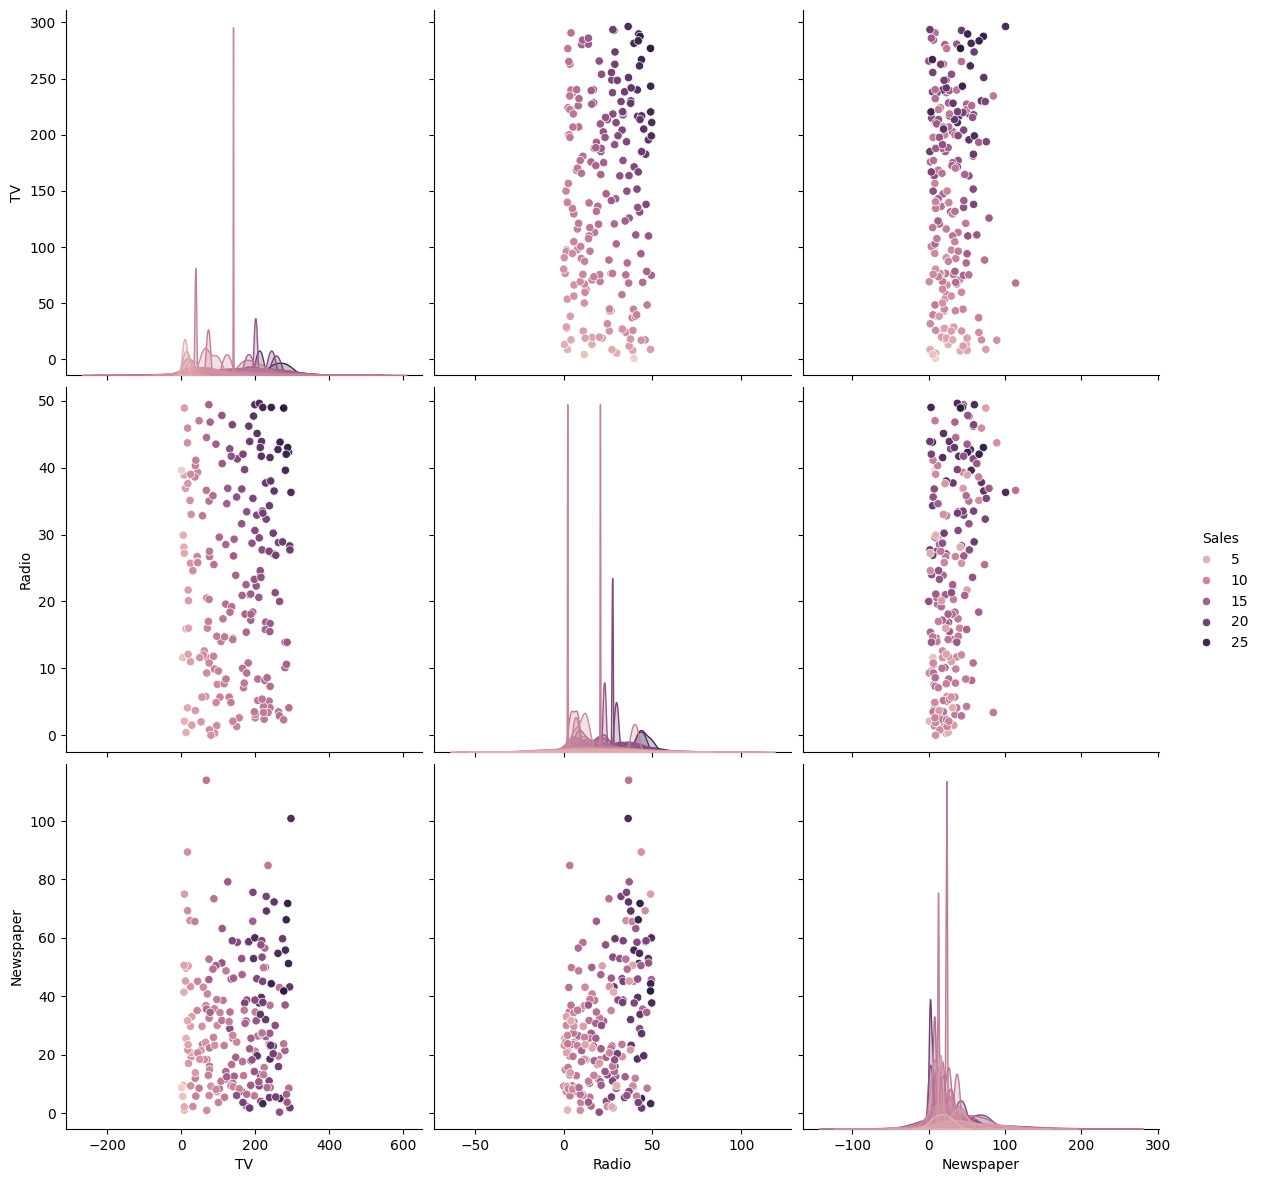

In [3]:
sns.pairplot(df_adv, hue='Sales', height=4)

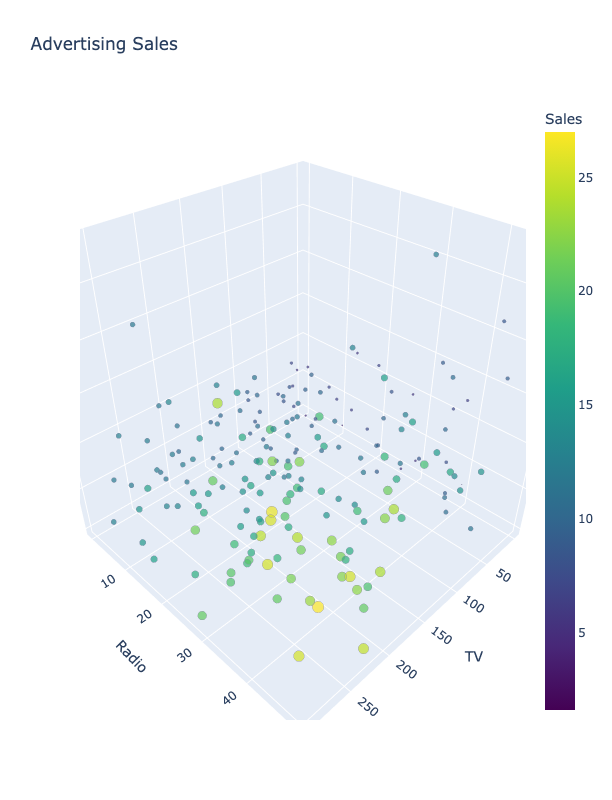

In [9]:
fig = go.Figure(data=go.Scatter3d(
    x=df_adv.TV,
    y=df_adv.Radio,
    z=df_adv.Newspaper,
    text=df_adv.Sales,
    mode='markers',
    marker=dict(
        sizemode='diameter',
        sizeref=2,
        size=df_adv.Sales,
        color = df_adv.Sales,
        colorscale='Viridis',
        colorbar_title = 'Sales',
        line_color = 'rgb(140, 140, 170)'
    )
))


fig.update_layout(height=800, width=800,
    scene=dict(
        xaxis_title='TV',
        yaxis_title='Radio',
        zaxis_title='Newspaper'
    ),
    title='Advertising Sales' 
)

fig.show()

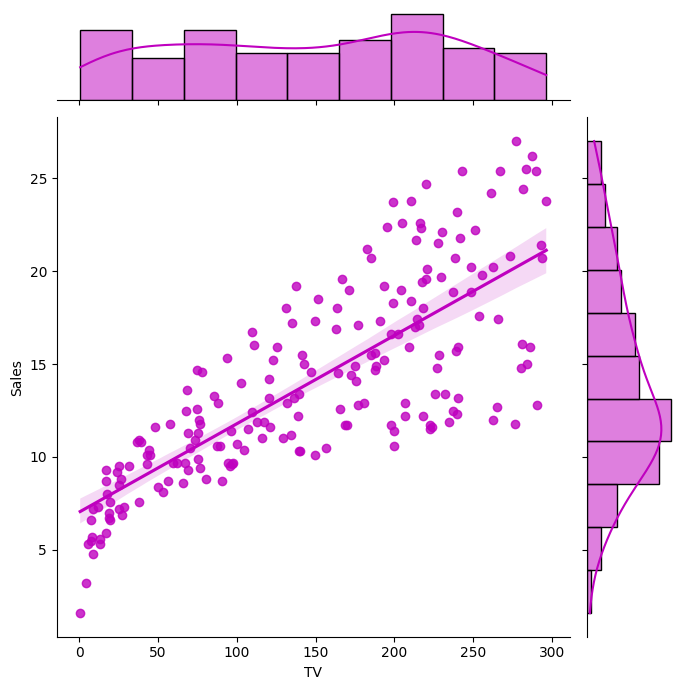

In [19]:
sns.jointplot(x='TV', y='Sales', data= df_adv,
              kind = 'reg', truncate = True, 
              color = 'm', height=7)

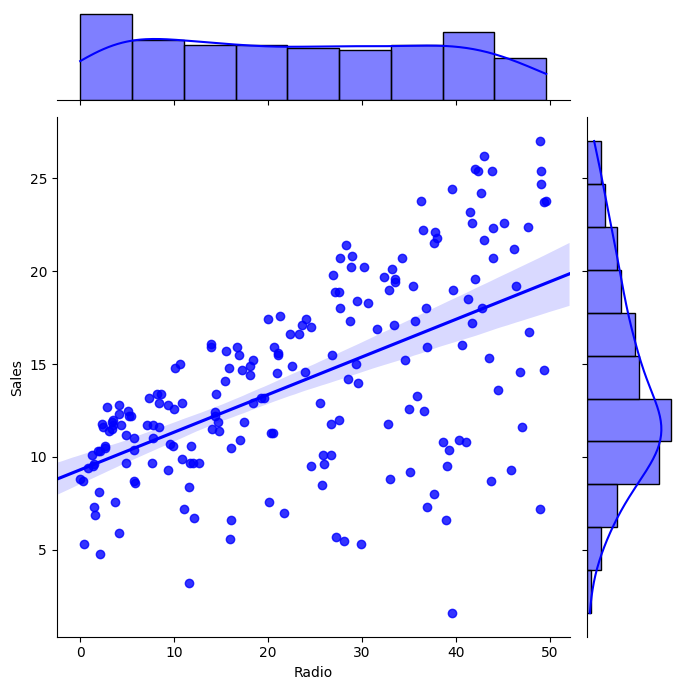

In [10]:
sns.jointplot(x= 'Radio', y='Sales', data = df_adv, 
              kind = 'reg', truncate = False, 
              color = 'b', height =7)

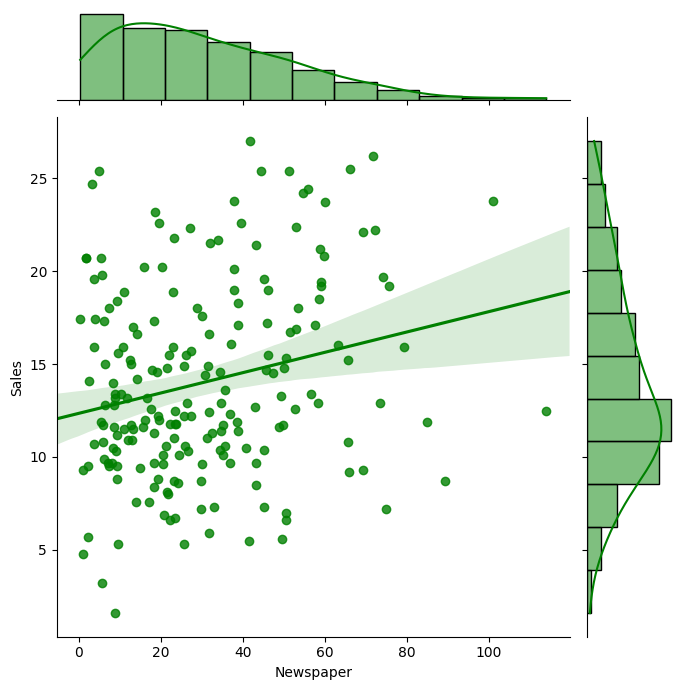

In [12]:
sns.jointplot(x="Newspaper", y="Sales", data=df_adv,
                  kind="reg", truncate=False,
                  color="g", height=7)

In [13]:
df_train, df_test = df_adv.iloc[0:150], df_adv.iloc[150:200]

In [14]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 1 to 150
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         150 non-null    float64
 1   Radio      150 non-null    float64
 2   Newspaper  150 non-null    float64
 3   Sales      150 non-null    float64
dtypes: float64(4)
memory usage: 5.9 KB


In [22]:
X_train, y_train = df_train[["TV","Radio","Newspaper"]],df_train["Sales"] #pandas , 拎data

# Create linear regression object
regr = linear_model.LinearRegression() #入model 

# Train the model using the training sets
regr.fit(X_train, y_train) #regr train 咗的 MODEL 

# Use the above trained model to predict the Sales in test df
y_pred = regr.predict(df_test[["TV","Radio","Newspaper"]])   #regr 用train jor model 做predict, 預測sale

In [23]:
type(regr)

sklearn.linear_model._base.LinearRegression

In [25]:
r2_score(df_test["Sales"], y_pred)

0.8963519785440216